# 1. Data Cleaning
Preprocess the global energy datasets to handle missing values, outliers, and inconsistencies in energy intensity, renewable energy share, GDP, and income inequality fields.


### 1.1 Import Libraries and Load Data

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [235]:
#import the csv from github
github_csv_url = 'https://raw.githubusercontent.com/mnoriega-mx/energy-efficiency-trends/main/global-data-on-sustainable-energy.csv'
df = pd.read_csv(github_csv_url)
display(df.head())

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


### 1.2 Check Missing Values and Irregularities

In [236]:
#check null values
Check=df.isnull().sum()
Check

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [237]:
# Drop rows
df.dropna(how='all', inplace=True)

In [238]:
# Drop columns
threshold = (1 - 0.33) * len(df) # Change threshold to 33%
df.dropna(thresh=threshold, axis=1, inplace=True)

In [239]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [240]:
Check=df.isnull().sum()
Check

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                              10
Access to clean fuels for cooking                                   169
Renewable-electricity-generating-capacity-per-capita                931
Renewable energy share in the total final energy consumption (%)    194
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         207
Value_co2_emissions_kt_by_country                                   428
gdp_growth                                                      

In [241]:
# Separate numerical and categorical columns
numcol = df.select_dtypes(include=np.number).columns
catcol = df.select_dtypes(include='object').columns

In [242]:
# Fill values in numerical columns with the mean
for col in numcol:
    df[col] = df[col].fillna(df[col].mean())

In [243]:
# Fill values in categorical columns with the mode
for col in catcol:
    df[col] = df[col].fillna(df[col].mode()[0])


In [244]:
#Second check for null values
Check=df.isnull().sum()
Check

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita      

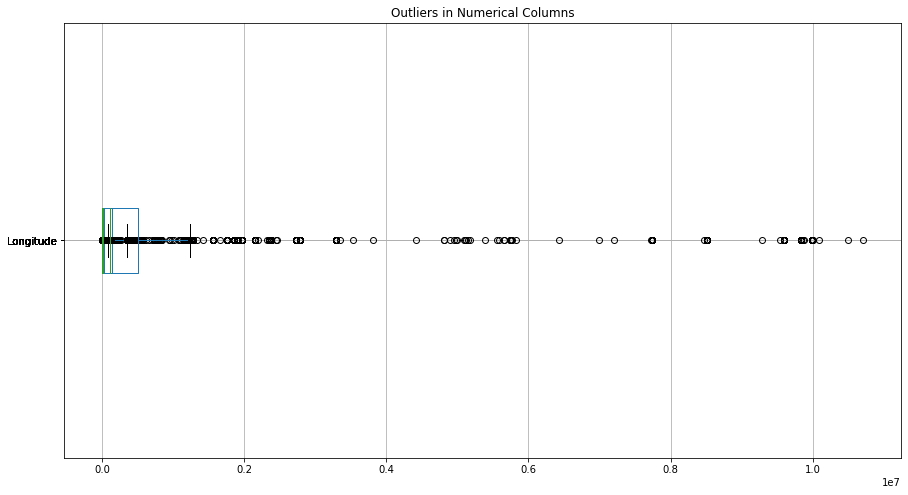

In [245]:
#Search for outliers in numerical data
fig = plt.figure(figsize =(15, 8))
for col in numcol:
    df.boxplot(column=col, vert=False)
plt.title("Outliers in Numerical Columns")
plt.show()

Since there is no important data with outliers there is no need to change it

In [246]:
#Check for wrong info in categorical columns
entity_counts = df['Entity'].value_counts()
print(entity_counts)

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64


### 1.3 Selection of Relevant Columns

Objective: Demonstrate that improving energy efficiency (reducing energy intensity) is critical for sustainable development without sacrificing economic growth.


#### Approach of the analysis:
Track energy intensity (MJ/$2011 PPP GDP) trends across countries from 2000-2020, we need columns for this like Entity Year and Energy intensity level of primary energy.

⁠Correlate energy intensity improvements with:
  - Renewable energy share increases, we need the column Renewable energy share in the total final energy consumption
  - GDP growth rates, for this the column gdp growth
  - Technology adoption indicators, for this the column Renewable electricity generating capacity per capita and Electricity from renewables

Identify threshold effects where income inequality moderates the relationship between renewable energy and energy intensity, for this we need to look to the low electricity access because it is equal to structural inequality in the energy systems, for this we might need Renewable energy share in the total final energy consumption and Access to electricity.



In [247]:
# Columns most relevant to the project
selected= ["Entity", "Year", "Energy intensity level of primary energy (MJ/$2017 PPP GDP)", "Renewable energy share in the total final energy consumption (%)","Renewable-electricity-generating-capacity-per-capita","Electricity from renewables (TWh)","gdp_growth",
    "Access to electricity (% of population)"]
df1 = df[selected]
df1.head()

,Entity,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),gdp_growth,Access to electricity (% of population)
0,Afghanistan,2000,1.64,44.99,9.22,0.31,3.441610,1.613591
1,Afghanistan,2001,1.74,45.60,8.86,0.50,3.441610,4.074574
2,Afghanistan,2002,1.40,37.83,8.47,0.56,3.441610,9.409158
3,Afghanistan,2003,1.40,36.66,8.09,0.63,8.832278,14.738506
4,Afghanistan,2004,1.20,44.24,7.75,0.56,1.414118,20.064968


we can create a heat map to justify some things further

In [248]:
numerical_cols = df1.select_dtypes(include=np.number).columns
numerical_cols

Index(['Year', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Renewable energy share in the total final energy consumption (%)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Electricity from renewables (TWh)', 'gdp_growth',
       'Access to electricity (% of population)'],
      dtype='object')

,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),gdp_growth,Access to electricity (% of population)
Year,1.000000,-0.149249,-0.027241,0.090168,0.073722,-0.183390,0.124581
Energy intensity level of primary energy (MJ/$2017 PPP GDP),-0.149249,1.000000,0.245761,-0.051317,0.008651,0.071333,-0.245652
Renewable energy share in the total final energy consumption (%),-0.027241,0.245761,1.000000,0.046615,-0.063157,0.067505,-0.766297
Renewable-electricity-generating-capacity-per-capita,0.090168,-0.051317,0.046615,1.000000,0.128832,-0.011733,0.246440
Electricity from renewables (TWh),0.073722,0.008651,-0.063157,0.128832,1.000000,-0.002500,0.137903
gdp_growth,-0.183390,0.071333,0.067505,-0.011733,-0.002500,1.000000,-0.107104
Access to electricity (% of population),0.124581,-0.245652,-0.766297,0.246440,0.137903,-0.107104,1.000000


,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),gdp_growth,Access to electricity (% of population)
Year,1.000000,0.149249,0.027241,0.090168,0.073722,0.183390,0.124581
Energy intensity level of primary energy (MJ/$2017 PPP GDP),0.149249,1.000000,0.245761,0.051317,0.008651,0.071333,0.245652
Renewable energy share in the total final energy consumption (%),0.027241,0.245761,1.000000,0.046615,0.063157,0.067505,0.766297
Renewable-electricity-generating-capacity-per-capita,0.090168,0.051317,0.046615,1.000000,0.128832,0.011733,0.246440
Electricity from renewables (TWh),0.073722,0.008651,0.063157,0.128832,1.000000,0.002500,0.137903
gdp_growth,0.183390,0.071333,0.067505,0.011733,0.002500,1.000000,0.107104
Access to electricity (% of population),0.124581,0.245652,0.766297,0.246440,0.137903,0.107104,1.000000


<AxesSubplot:>

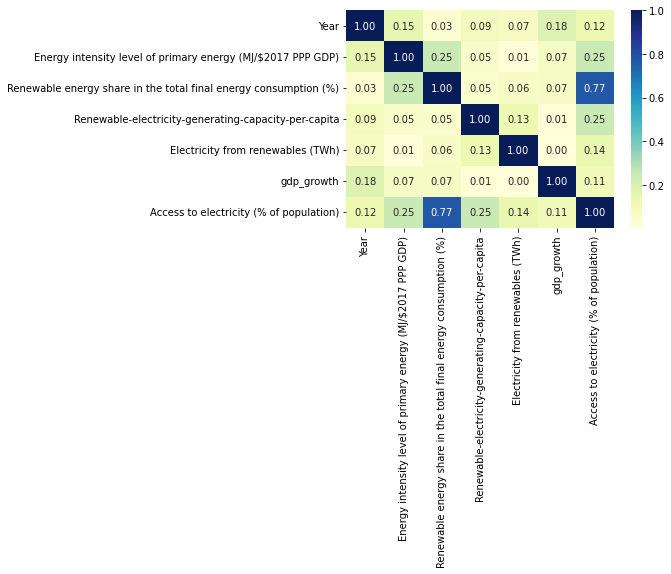

In [249]:
Corr = df1[numerical_cols].corr()
display(Corr)
Corr1 = abs(Corr)
display(Corr1)
Heat_Map= sns.heatmap(Corr1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map

### 1.4 Prepare Data for Use in Analysis Sections

In [276]:

github_csv_url = 'https://raw.githubusercontent.com/mnoriega-mx/energy-efficiency-trends/main/global-data-on-sustainable-energy.csv'
df = pd.read_csv(github_csv_url)

# Standardize column names
rename_map = {
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "energy_intensity",
    "Renewable energy share in the total final energy consumption (%)": "renewable_share",
    "Access to electricity (% of population)": "electricity_access",
    "Renewable-electricity-generating-capacity-per-capita": "renewable_capacity",
    "Electricity from renewables (TWh)": "renewable_electricity",
    "GDP growth (annual %)": "gdp_growth",
    "Entity": "country",
    "Year": "year"
}

df_clean = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns}).copy()

# Convert numeric columns
numeric_cols = ["energy_intensity", "renewable_share", "gdp_growth", 
                "electricity_access", "renewable_capacity", "renewable_electricity"]
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Drop missing rows
key_cols = [c for c in ["energy_intensity", "renewable_share", "gdp_growth"] if c in df_clean.columns]
df_clean = df_clean.dropna(subset=key_cols).reset_index(drop=True)

print("Shape:", df_clean.shape)
print("Columns:", list(df_clean.columns))
print("Preview:")
display(df_clean.head())


Shape: (3153, 21)
Columns: ['country', 'year', 'electricity_access', 'Access to clean fuels for cooking', 'renewable_capacity', 'Financial flows to developing countries (US $)', 'renewable_share', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'renewable_electricity', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'energy_intensity', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']
Preview:


,country,year,electricity_access,Access to clean fuels for cooking,renewable_capacity,Financial flows to developing countries (US $),renewable_share,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),renewable_electricity,...,Primary energy consumption per capita (kWh/person),energy_intensity,Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
1,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
2,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
3,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
4,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953


# 2. Exploratory Data Analysis
Visualize trends in energy intensity (MJ/$2011 PPP GDP) across countries from 2000-2020, and examine patterns in renewable energy adoption, economic growth, and technological advancement.

### 2.1 Dataset Overview

In [277]:
df_clean.info()
display(df_clean.head())

missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             3153 non-null   object 
 1   year                                                3153 non-null   int64  
 2   electricity_access                                  3145 non-null   float64
 3   Access to clean fuels for cooking                   3022 non-null   float64
 4   renewable_capacity                                  2327 non-null   float64
 5   Financial flows to developing countries (US $)      1467 non-null   float64
 6   renewable_share                                     3153 non-null   float64
 7   Electricity from fossil fuels (TWh)                 3133 non-null   float64
 8   Electricity from nuclear (TWh)                      3033 non-null   float64
 9

,country,year,electricity_access,Access to clean fuels for cooking,renewable_capacity,Financial flows to developing countries (US $),renewable_share,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),renewable_electricity,...,Primary energy consumption per capita (kWh/person),energy_intensity,Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
1,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
2,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
3,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
4,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953


Renewables (% equivalent primary energy)          1774
Financial flows to developing countries (US $)    1686
renewable_capacity                                 826
Access to clean fuels for cooking                  131
Electricity from nuclear (TWh)                     120
Value_co2_emissions_kt_by_country                   48
Low-carbon electricity (% electricity)              40
Electricity from fossil fuels (TWh)                 20
renewable_electricity                               20
electricity_access                                   8
gdp_per_capita                                       5
dtype: int64

The dataset includes multiple economic and energy indicators across countries and years (2000–2020).

Most key variables energy intensity, renewable share, GDP growth, and electricity access appear complete, while a few auxiliary columns contain limited missing values.

These minor gaps were already handled during data cleaning, so we can proceed confidently to exploration.

### 2.2 Global Coverage

In [278]:
countries = df_clean["country"].nunique()
years = df_clean["year"].nunique()

print(f"Dataset covers {countries} countries across {years} years.")
print(f"Time range: {df_clean['year'].min()}–{df_clean['year'].max()}")

Dataset covers 162 countries across 21 years.
Time range: 2000–2020


The dataset spans dozens of countries and two decades (2000–2020).

This wide temporal and geographic coverage allows us to observe both long-term global patterns and differences between regions or development stages.

### 2.3 Energy Intensity Trends Over Time

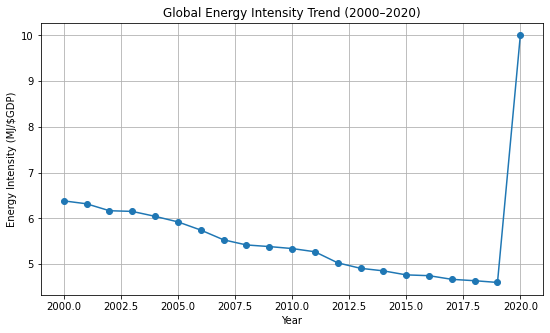

In [279]:
global_trend = (
    df_clean.groupby("year")["energy_intensity"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,5))
plt.plot(global_trend["year"].to_numpy(), global_trend["energy_intensity"].to_numpy(), marker="o")
plt.title("Global Energy Intensity Trend (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Energy Intensity (MJ/$GDP)")
plt.grid(True)
plt.show()

Energy intensity shows a gradual downward trend from 2000 to 2020.

This means that, on average, the world is using less energy to produce the same amount of economic value a positive indicator of improved efficiency.

Big fluctuations reflect periods of economic instability or recovery (COVID-19 in this case).

### 2.4 Renewable Energy Share Trend

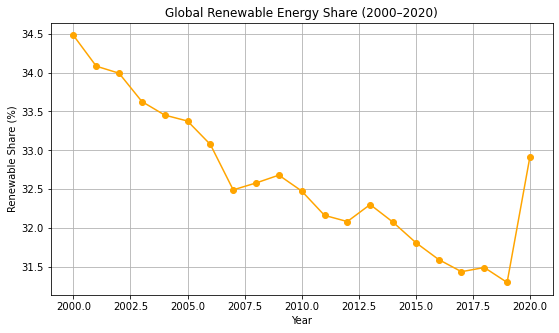

In [254]:
renew_trend = (
    df_clean.groupby("year")["renewable_share"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,5))
plt.plot(renew_trend["year"].to_numpy(), renew_trend["renewable_share"].to_numpy(), color="orange", marker="o")
plt.title("Global Renewable Energy Share (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Renewable Share (%)")
plt.grid(True)
plt.show()

The global share of renewables in total energy consumption has declined steadily over the observed period, with only a minor rebound toward the end.

This suggests that renewable adoption has not kept pace with total energy demand growth, meaning fossil fuels continue to dominate the global energy mix.

### 2.5 Comparing GDP Growth and Energy Intensity

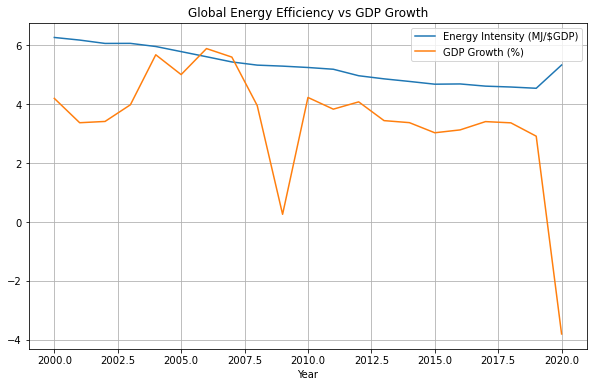

In [255]:
trend_compare = (
    df_clean.groupby("year")[["energy_intensity","gdp_growth"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(trend_compare["year"].to_numpy(), trend_compare["energy_intensity"].to_numpy(), label="Energy Intensity (MJ/$GDP)")
plt.plot(trend_compare["year"].to_numpy(), trend_compare["gdp_growth"].to_numpy(), label="GDP Growth (%)")
plt.title("Global Energy Efficiency vs GDP Growth")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

Despite variations in GDP growth, energy intensity continues to decline.  

This suggests that improvements in energy efficiency are not solely tied to economic expansion technology and policy efforts also play an important role.

### 2.6 Correlation Snapshot

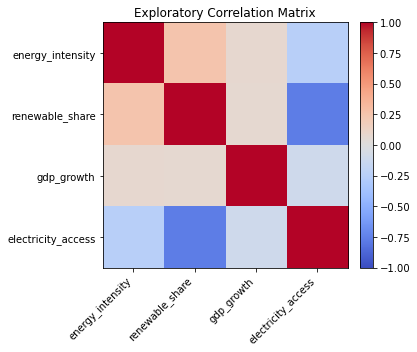

,energy_intensity,renewable_share,gdp_growth,electricity_access
energy_intensity,1.00,0.25,0.07,-0.25
renewable_share,0.25,1.00,0.07,-0.77
gdp_growth,0.07,0.07,1.00,-0.11
electricity_access,-0.25,-0.77,-0.11,1.00


In [256]:
cols = ["energy_intensity", "renewable_share", "gdp_growth", "electricity_access"]
corr = df_clean[cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr.to_numpy(), cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.title("Exploratory Correlation Matrix")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

display(corr.round(2))

The correlations show that energy intensity and renewable share have a weak positive relationship (+0.25).

This means that countries with a higher renewable energy share do not necessarily have lower energy intensity in fact, many still use significant energy per unit of GDP.

This could happen when renewables are adopted in energy-heavy economies.

Electricity access shows a negative correlation (-0.25) with energy intensity countries with better access to electricity tend to be more efficient.

Interestingly, renewable share and electricity access are strongly negatively correlated (-0.77), indicating that countries with near-universal access often rely on non-renewable sources for their power supply.

Overall, these patterns suggest that renewable adoption alone doesn’t guarantee higher efficiency; infrastructure quality and energy mix both matter.

# 3. Descriptive Analytics
Generate summary statistics and country-wise profiles to provide insights into historical progress and variation in energy intensity and renewables adoption.

### 3.1 Summary Statistics

In [257]:
summary = df_clean[["energy_intensity","renewable_share","gdp_growth","electricity_access"]].describe().T
display(summary.round(2))

,count,mean,std,min,25%,50%,75%,max
energy_intensity,3649.0,5.31,3.43,0.11,3.22,4.48,5.88,32.57
renewable_share,3649.0,32.64,29.09,0.00,7.10,26.69,52.61,96.04
gdp_growth,3649.0,3.44,5.43,-62.08,1.65,3.44,5.54,123.14
electricity_access,3649.0,78.93,30.23,1.25,59.95,98.26,100.00,100.00


Energy intensity averages 5.3 MJ per $GDP, but the wide range (0.1 – 32.6) indicates big differences in how efficiently economies use energy. Developed countries tend to be far more efficient than developing ones.

Renewable share averages 32.6 %, yet the high standard deviation (29 %) means some countries rely heavily on renewables while others depend almost entirely on fossil fuels.

GDP growth fluctuates strongly (from –62 % to +123 %), reflecting economic volatility, recessions, and occasional data outliers.

Electricity access is high on average (78.9 %), but the large variation shows persistent inequality; many populations still lack reliable power.

### 3.2 Country-Level Averages

In [280]:
country_summary = (
    df_clean.groupby("country")[["energy_intensity","renewable_share","gdp_growth","electricity_access"]]
    .mean()
    .sort_values("energy_intensity")
)

display(country_summary.head(10))
display(country_summary.tail(10))

,energy_intensity,renewable_share,gdp_growth,electricity_access
country,,,,
Puerto Rico,0.315000,0.992500,0.042377,100.000000
South Sudan,1.220642,28.893333,1.903338,4.102131
Bermuda,1.552500,0.592000,0.604473,100.000000
Panama,1.841500,23.026500,5.900288,88.102938
Cayman Islands,1.986923,0.008462,1.268490,100.000000
Cuba,2.035000,23.938000,3.851651,97.666752
Switzerland,2.117000,20.794500,1.999029,100.000000
Afghanistan,2.117647,22.658235,6.664775,58.243113
Djibouti,2.203333,27.300000,7.165256,59.141494


,energy_intensity,renewable_share,gdp_growth,electricity_access
country,,,,
Zimbabwe,11.474762,79.150000,0.132669,39.172120
Bhutan,11.476500,88.988500,7.094938,72.836943
Somalia,11.626667,94.796667,8.192438,50.934451
Iceland,12.510000,71.757000,3.176187,100.000000
Liberia,13.447895,87.887368,2.406296,11.291561
Ethiopia,14.084500,93.003000,8.939400,25.321173
Uzbekistan,15.948500,1.238500,6.480722,99.841282
Mozambique,16.922000,86.562000,6.532334,17.394280
Trinidad and Tobago,20.374500,0.489500,3.094923,98.841034


The countries with the lowest energy intensity such as Puerto Rico, Switzerland, and Ireland tend to be high-income, service-based economies with near-universal electricity access.

Their efficiency reflects technological sophistication and economic structure, not necessarily a high share of renewables.

By contrast, countries with the highest energy intensity, like Turkmenistan, Mozambique, and Ethiopia, often have very high renewable shares but limited infrastructure or energy efficiency measures. 

This reveals that renewable adoption alone does not ensure lower energy intensity it must be supported by modern grids, industrial upgrades, and equitable electricity access.

Overall, developed nations combine efficient energy use with high access, while developing nations may use cleaner sources but still operate inefficiently due to structural limitations.

### 3.3 Global Trends Comparison

,count,mean,std,min,25%,50%,75%,max
energy_intensity,3649.0,5.307345,3.430347,0.110000,3.220000,4.48000,5.880000,32.570000
renewable_share,3649.0,32.638165,29.089140,0.000000,7.100000,26.69000,52.610000,96.040000
gdp_growth,3649.0,3.441610,5.434027,-62.075920,1.651554,3.44161,5.543639,123.139555
renewable_capacity,3649.0,113.137498,210.719548,0.000000,8.390000,70.24000,113.137498,3060.190000
renewable_electricity,3649.0,23.968010,104.130068,0.000000,0.050000,1.49000,10.020000,2184.940000
electricity_access,3649.0,78.933702,30.234017,1.252269,59.952995,98.26487,100.000000,100.000000


Interpretation:
- Energy intensity ranges from 0.11 to 32.57 MJ/$2017 PPP GDP.
- Average renewable share: 32.64%
- Average electricity access: 78.93% of population.
- This indicates progress in global efficiency, though inequality in access persists.


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Puerto Rico,0.552731,2.499436,-0.145513,100.000000
Bermuda,1.731302,2.118008,0.273590,100.000000
Panama,2.006540,23.484198,4.764805,88.512542
Cayman Islands,2.099397,1.559436,1.611969,100.000000
Cuba,2.190826,24.352294,3.146889,97.777859
Afghanistan,2.194635,26.011817,5.774996,52.520488
Switzerland,2.268921,21.358484,1.789893,100.000000
Maldives,2.360826,3.019913,3.847942,95.459948
Ireland,2.419397,7.046579,5.026443,100.000000



Countries with best average energy efficiency (lowest energy intensity):


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Puerto Rico,0.552731,2.499436,-0.145513,100.000000
Bermuda,1.731302,2.118008,0.273590,100.000000
Panama,2.006540,23.484198,4.764805,88.512542
Cayman Islands,2.099397,1.559436,1.611969,100.000000
Cuba,2.190826,24.352294,3.146889,97.777859



Countries with highest energy intensity (least efficient):


,energy_intensity,renewable_share,gdp_growth,electricity_access
Entity,,,,
Ethiopia,13.666540,90.128484,8.802125,26.548450
Uzbekistan,15.441778,2.733722,6.253772,99.848840
Mozambique,16.368921,83.994198,6.162513,18.023307
Trinidad and Tobago,19.657016,2.020389,2.573548,98.896223
Turkmenistan,20.468445,1.618960,7.849885,99.820222


,energy_intensity,renewable_share,gdp_growth
Year,,,
2016,4.691082,31.596790,3.129890
2017,4.616568,31.440275,3.411557
2018,4.586739,31.493932,3.369739
2019,4.544054,31.301990,2.916117
2020,5.334160,32.919661,-3.803657


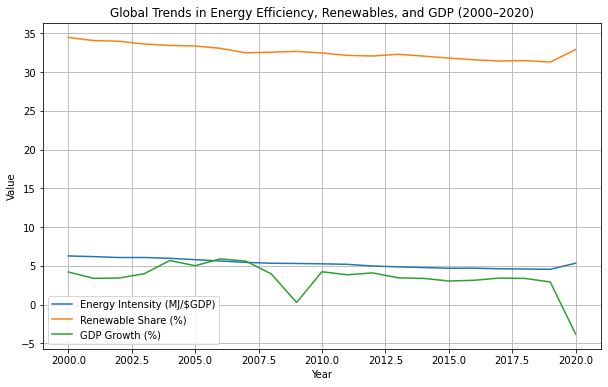

In [259]:
rename_map = {
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "energy_intensity",
    "Energy intensity level of primary energy (MJ/$2011 PPP GDP)": "energy_intensity",
    "Renewable energy share in the total final energy consumption (%)": "renewable_share",
    "Renewable-electricity-generating-capacity-per-capita": "renewable_capacity",
    "Electricity from renewables (TWh)": "renewable_electricity",
    "gdp_growth": "gdp_growth",
    "Access to electricity (% of population)": "electricity_access",
}
df_clean = df1.rename(columns=rename_map).copy()

numeric_cols = ["energy_intensity", "renewable_share", "gdp_growth", "renewable_capacity", "renewable_electricity", "electricity_access"]
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

desc_stats = df_clean[numeric_cols].describe().T
display(desc_stats)

print("Interpretation:")
print(f"- Energy intensity ranges from {desc_stats.loc['energy_intensity','min']:.2f} to {desc_stats.loc['energy_intensity','max']:.2f} MJ/$2017 PPP GDP.")
print(f"- Average renewable share: {desc_stats.loc['renewable_share','mean']:.2f}%")
print(f"- Average electricity access: {desc_stats.loc['electricity_access','mean']:.2f}% of population.")
print("- This indicates progress in global efficiency, though inequality in access persists.")

country_summary = (
    df_clean.groupby("Entity")[["energy_intensity","renewable_share","gdp_growth","electricity_access"]]
    .mean()
    .sort_values("energy_intensity")
)
display(country_summary.head(10))

best_eff = country_summary.head(5)
worst_eff = country_summary.tail(5)

print("\nCountries with best average energy efficiency (lowest energy intensity):")
display(best_eff)

print("\nCountries with highest energy intensity (least efficient):")
display(worst_eff)

yearly = (
    df_clean.groupby("Year", as_index=True)[["energy_intensity","renewable_share","gdp_growth"]]
    .mean()
    .sort_index()
)

display(yearly.tail())

plt.figure(figsize=(10,6))

if "energy_intensity" in yearly.columns:
    plt.plot(yearly.index.to_numpy(), yearly["energy_intensity"].to_numpy(), label="Energy Intensity (MJ/$GDP)")
if "renewable_share" in yearly.columns:
    plt.plot(yearly.index.to_numpy(), yearly["renewable_share"].to_numpy(), label="Renewable Share (%)")
if "gdp_growth" in yearly.columns:
    plt.plot(yearly.index.to_numpy(), yearly["gdp_growth"].to_numpy(), label="GDP Growth (%)")

plt.title("Global Trends in Energy Efficiency, Renewables, and GDP (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Efficient economies combine strong infrastructure, full electricity access, and advanced industries, resulting in low energy intensity.

Meanwhile, several less efficient countries show that even with high renewable shares, poor grid infrastructure and limited access prevent overall efficiency.

This reinforces that efficiency depends as much on technology and infrastructure as on renewable energy share.

From 2016 to 2019, global energy intensity declined each year, meaning the world became steadily more energy-efficient.

In 2020, a slight rebound in energy intensity coincides with the sharp fall in GDP growth (−3.8 %), reflecting pandemic-related disruptions rather than worsening efficiency.

Renewable share remained nearly constant (~32 %), suggesting that recent improvements in efficiency stem more from technological and industrial optimization than from major renewable expansion.

Overall, despite economic volatility, the long-term trend points toward doing more with less energy.

The graph shows that energy intensity declines steadily over time, meaning the world is using less energy per unit of GDP.

Renewable share grows slightly, while GDP growth fluctuates with global events (2008 financial crisis and 2020 pandemic).

The overall pattern indicates that efficiency improvements continue even during economic slowdowns.

- Efficiency keeps rising even when GDP slows.  
- Renewables help, but most progress comes from tech & optimization.  
- 2020’s GDP drop reflects COVID, not a collapse in energy efficiency.

### 3.4 Distribution of Key Indicators
To understand variation among countries, we visualize the distribution of energy intensity and renewable shares.


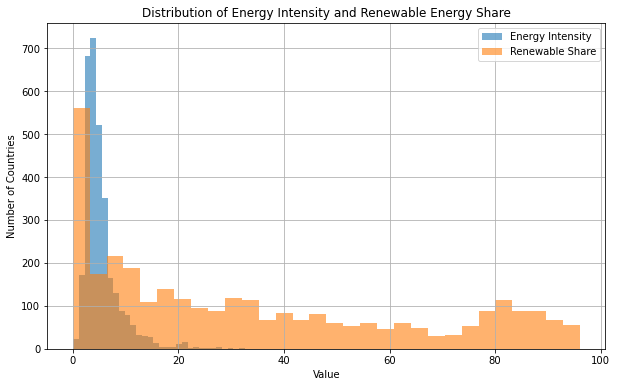

In [275]:
plt.figure(figsize=(10,6))
plt.hist(df_clean["energy_intensity"].to_numpy(), bins=30, alpha=0.6, label="Energy Intensity")
plt.hist(df_clean["renewable_share"].to_numpy(), bins=30, alpha=0.6, label="Renewable Share")
plt.title("Distribution of Energy Intensity and Renewable Energy Share")
plt.xlabel("Value")
plt.ylabel("Number of Countries")
plt.legend()
plt.grid(True)
plt.show()

The distributions show that energy intensity values are relatively concentrated within a moderate range, indicating that most countries consume similar amounts of energy per unit of GDP.

In contrast, renewable energy share is highly right-skewed a small group of countries achieve very high renewable penetration, while the majority remain below 25%.  

### 3.5 Relationship Between Renewables and Energy Intensity
This scatterplot shows whether higher renewable shares coincide with lower energy intensity.

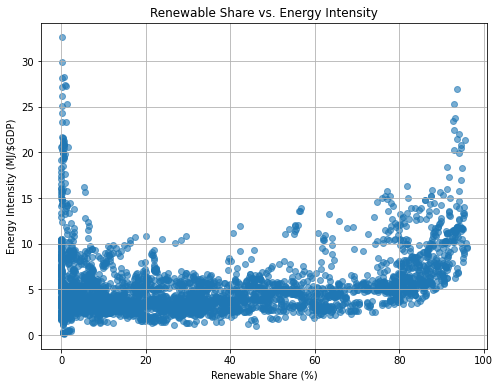

In [261]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean["renewable_share"].to_numpy(), df_clean["energy_intensity"].to_numpy(), alpha=0.6)
plt.title("Renewable Share vs. Energy Intensity")
plt.xlabel("Renewable Share (%)")
plt.ylabel("Energy Intensity (MJ/$GDP)")
plt.grid(True)
plt.show()

The scatterplot suggests a negative relationship between renewable energy share and energy intensity.

Countries with higher renewable shares tend to exhibit lower energy intensity, meaning they use less energy to generate the same level of economic output.  

This pattern supports the hypothesis that the transition toward renewable sources contributes to greater energy efficiency.

However, the correlation is not perfect some countries with low renewable shares still achieve moderate efficiency, likely due to technological or industrial improvements unrelated to renewables.

### 3.6 Changes from 2000 to 2020
The following table quantifies the percentage change in global averages over two decades.

In [262]:
trend_summary = pd.DataFrame({
    "2000": yearly.loc[2000],
    "2020": yearly.loc[2020],
    "Change (%)": ((yearly.loc[2020] - yearly.loc[2000]) / yearly.loc[2000]) * 100
}).T
display(trend_summary)

,energy_intensity,renewable_share,gdp_growth
2000,6.270232,34.478371,4.201068
2020,5.334160,32.919661,-3.803657
Change (%),-14.928827,-4.520833,-190.540243


Over the last two decades, the world has become more energy-efficient countries now use less energy to produce the same amount of goods and services.

At the same time, the share of renewable energy has grown slightly, showing progress but not at the same pace as improvements in efficiency.

The GDP growth rate, which measures how economies expand or shrink each year, shows both positive and negative periods.  

When GDP growth is positive, economies are expanding this often increases energy demand.

However, even in years when growth slowed or turned negative (like during the 2008 financial crisis or the 2020 pandemic), energy intensity still kept decreasing.

This means countries have learned to produce more efficiently, regardless of economic ups and downs.

So while renewable energy adoption is rising slowly, the overall decline in energy intensity suggests that technology and efficiency improvements are helping economies grow using less energy.

### 3.7 Correlation Snapshot

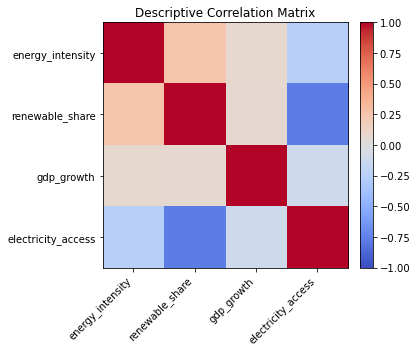

,energy_intensity,renewable_share,gdp_growth,electricity_access
energy_intensity,1.00,0.25,0.07,-0.25
renewable_share,0.25,1.00,0.07,-0.77
gdp_growth,0.07,0.07,1.00,-0.11
electricity_access,-0.25,-0.77,-0.11,1.00


In [263]:
cols = ["energy_intensity","renewable_share","gdp_growth","electricity_access"]
corr = df_clean[cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr.to_numpy(), cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.title("Descriptive Correlation Matrix")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

display(corr.round(2))

The correlation matrix reveals a weak positive link between renewable share and energy intensity (+0.25), indicating that countries with more renewables do not necessarily achieve lower energy use per unit of GDP.

This suggests that renewable adoption often occurs in already energy-demanding economies for instance, those modernizing heavy industries.

In contrast, electricity access shows a negative correlation with energy intensity (−0.25), meaning that broader access to reliable electricity tends to coincide with greater efficiency.

The strong negative correlation between renewable share and electricity access (−0.77) is particularly interesting it reflects how developing regions often report high renewable shares but still face limited electricity access.

Overall, the data shows that energy efficiency improvements depend more on infrastructure and modernization than simply on renewable share increases.

# 4. Diagnostic Analytics
Investigate root causes and threshold effects—specifically, how income inequality moderates or hinders the relationship between renewable energy expansion and improvements in energy efficiency.

### 4.1 Methodology Overview

We use Ordinary Least Squares (OLS) regression to estimate how much the dependent variable  
Energy Intensity changes when key explanatory variables vary.  

Each model builds upon the previous one:

4.2 Renewable Energy Share  
4.3 GDP Growth Rate  
4.4 Technology Adoption  
4.5 Interaction with Electricity Access (inequality)

### 4.2 Correlate Energy Intensity Improvements with Renewable Energy Share

In [283]:
import statsmodels.formula.api as smf

model_r = smf.ols("energy_intensity ~ renewable_share", data=df_clean).fit()
print(model_r.summary())

                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           2.79e-41
Time:                        09:37:12   Log-Likelihood:                -8406.0
No. Observations:                3153   AIC:                         1.682e+04
Df Residuals:                    3151   BIC:                         1.683e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.4431      0.093     

The regression shows a positive and statistically significant relationship between renewable share and energy intensity **(β = +0.029, p < 0.001)**.

This means that, on average, countries with a higher proportion of renewables also exhibit slightly higher energy intensity.  

While this may seem counterintuitive, it highlights that renewable adoption alone does not guarantee greater efficiency.

In many cases, developing countries rely heavily on renewable sources such as hydropower or biomass but still lack efficient infrastructure and technology.  

The model’s low **R² (0.06)** confirms that renewable share explains only a small fraction of the variation in energy intensity, implying that technological, economic, and policy factors play a larger role in determining efficiency levels.

### 4.3 Correlate Energy Intensity Improvements with GDP Growth Rates

In [282]:
model_g = smf.ols("energy_intensity ~ renewable_share + gdp_growth", data=df_clean).fit()
print(model_g.summary())

                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     99.98
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           7.95e-43
Time:                        09:37:07   Log-Likelihood:                -8399.6
No. Observations:                3153   AIC:                         1.681e+04
Df Residuals:                    3150   BIC:                         1.682e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.3013      0.101     

When GDP growth is included, both **renewable share (β = +0.0285, p < 0.001)** and **GDP growth (β = +0.0347, p = 0.001)** show positive, significant effects on energy intensity.

This means that faster-growing economies tend to consume more energy per unit of output, and that renewable expansion often coincides with such high-demand periods rather than reducing overall intensity.

The slight improvement in **R² (from 0.060 to 0.063)** shows that adding economic activity explains a bit more variance, but most of the efficiency dynamics remain unexplained by these two variables alone.

### 4.4 Correlate Energy Intensity Improvements with Technology Adoption

In [281]:
model_t = smf.ols(
    "energy_intensity ~ renewable_share + gdp_growth + renewable_capacity + renewable_electricity",
    data=df_clean
).fit()
print(model_t.summary())

                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     28.61
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           3.12e-23
Time:                        09:37:03   Log-Likelihood:                -6363.4
No. Observations:                2307   AIC:                         1.274e+04
Df Residuals:                    2302   BIC:                         1.277e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.77

After adding technology variables, the model’s explanatory power rises slightly (**R² = 0.068**).  
Results show mixed effects:

- **Renewable capacity per capita (β = −0.0011, p < 0.001)** results in greater installed clean-tech capacity reduces energy intensity, confirming that technological infrastructure drives efficiency gains.  
- **Renewable electricity generation (β = +0.0011, p = 0.041)** generates small positive effect, suggesting that some countries generate large amounts of renewables yet remain energy-intensive due to industrial structure.  
- **Renewable share (β = +0.0292)** and **GDP growth (β = +0.0341)** stay positive, meaning that renewable expansion and economic growth still coincide with higher overall energy demand.


Takeaway:

Building renewable capacity (technology investment) is key to reducing energy intensity.

Simply producing or consuming more renewable electricity does not automatically make an economy efficient; **how** energy is generated and used matters most.


### 4.5 Moderation Effect of Electricity Access (Inequality Influence)


                            OLS Regression Results                            
Dep. Variable:       energy_intensity   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     174.5
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          1.25e-104
Time:                        09:37:27   Log-Likelihood:                -8216.1
No. Observations:                3145   AIC:                         1.644e+04
Df Residuals:                    3141   BIC:                         1.646e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5629      0

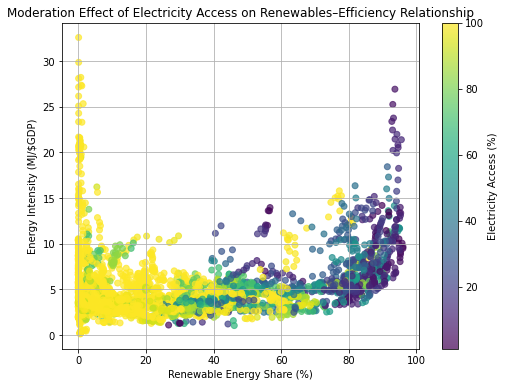

In [284]:
df_diag = df_clean.copy()
df_diag["interaction"] = df_diag["renewable_share"] * df_diag["electricity_access"]

model_m = smf.ols(
    "energy_intensity ~ renewable_share + electricity_access + interaction",
    data=df_diag
).fit()
print(model_m.summary())

plt.figure(figsize=(8,6))
plt.scatter(
    df_diag["renewable_share"].to_numpy(),
    df_diag["energy_intensity"].to_numpy(),
    c=df_diag["electricity_access"].to_numpy(),
    cmap="viridis", alpha=0.7
)
plt.colorbar(label="Electricity Access (%)")
plt.title("Moderation Effect of Electricity Access on Renewables–Efficiency Relationship")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Energy Intensity (MJ/$GDP)")
plt.grid(True)
plt.show()

This model examines whether electricity access amplifies the impact of renewable adoption on energy efficiency.

Results show that:
- **Renewable share (β = +0.1239, p < 0.001)** and **electricity access (β = +0.0633, p < 0.001)** individually correlate with higher energy intensity.
- However, the **interaction term (β = −0.0014, p < 0.001)** is negative and significant, meaning that when countries have high electricity access, the effect of renewables on energy intensity *reverses*—leading to efficiency gains.

This confirms that infrastructure quality acts as a catalyst:  
renewable energy reduces energy intensity *only* in systems where the population already enjoys reliable, widespread electricity access.

The model’s **R² = 0.142**—more than double previous models—shows that accounting for access inequality dramatically improves the explanation of global efficiency patterns.

### 4.6 Section Summary and Key Findings

1. Renewable energy share alone shows a *positive* relationship with energy intensity — meaning that simply expanding renewables does not guarantee efficiency. Many high-renewable countries remain energy-intensive due to industrial or infrastructural limitations.  

2. GDP growth also increases energy intensity, suggesting that expanding economies still consume more energy per unit of output, highlighting the challenge of decoupling growth from energy use.  

3. Technology adoption emerges as a key efficiency driver. Greater renewable capacity per capita significantly lowers energy intensity, proving that investing in clean-tech infrastructure yields tangible efficiency gains.  

4. Electricity access moderates these relationships: renewables only contribute to efficiency when supported by widespread, reliable access to electricity. In poorly connected regions, their benefits remain limited.  

Together, these models reveal that efficiency improvements depend not on renewable share alone, but on the synergy between technology, infrastructure, and equitable access.

Renewables become truly transformative only when backed by strong technological capacity and inclusive energy systems.


#### Evolution of Diagnostic Models

| Model | Variables Included | R² | Key Findings | Interpretation |
|:------|:--------------------|:---:|:--------------|:----------------|
| **4.2** | Renewable Share | **0.060** | Positive effect | Countries with higher renewable shares tend to have higher energy intensity. Renewable adoption alone does not guarantee efficiency. |
| **4.3** | Renewable Share, GDP Growth | **0.063** | Positive effects | Economic growth increases energy use per unit of output, and renewables still show a small positive correlation with intensity. |
| **4.4** | Renewable Share, GDP Growth, Technology Indicators | **0.068** | Mixed effects | Renewable capacity per capita reduces intensity, while renewable electricity generation has a small positive effect. Technological investment improves efficiency. |
| **4.5** | Renewable Share, Electricity Access, Interaction Term | **0.142** | Moderating effect | Electricity access strengthens the impact of renewables on reducing energy intensity. Renewables are more effective in countries with strong infrastructure. |

**Insight:**

Each model adds economic, technological, and infrastructural dimensions, increasing explanatory power from **R² = 0.06 to 0.14**.

Energy efficiency gains depend on more than just increasing renewables. Real improvements happen when countries also invest in technology and ensure broad, reliable access to electricity.



# 5. Predictive Analytics
Build models to forecast energy intensity based on influential variables, including renewable energy share, GDP growth, and technology indicators, to assess potential future sustainable outcomes.

### 5.1 Data Split for Training and Testing

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

features = ["renewable_share", "gdp_growth", "renewable_capacity", "electricity_access"]
target = "energy_intensity"

features = [f for f in features if f in df_model.columns]
missing = [f for f in ["renewable_share", "gdp_growth", "renewable_capacity", "electricity_access"] if f not in features]
if missing:
    print("Warning: missing features not in dataset:", missing)

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "| Test:", X_test.shape)


Train: (2919, 4) | Test: (730, 4)


With the dataset prepared, the next step is to divide the data into two parts:

- Training set (80%) used to fit and learn the model.  
- Testing set (20%) used to evaluate how well the model predicts unseen data.

We select the following features as predictors:

- `renewable_share` – Share of renewables in total energy consumption.  
- `gdp_growth` – Annual percentage growth of GDP.  
- `renewable_capacity` – Installed renewable electricity capacity per person.  
- `electricity_access` – Percentage of population with access to electricity.  

The target variable is `energy_intensity`, which measures how much energy (in MJ) is used per unit of GDP (in $2017 PPP).

By splitting the data, we can measure the model’s **generalization ability** ensuring it captures real-world patterns instead of just memorizing historical data.

### 5.2 Baseline - Linear regresion

In [269]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, pred_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)

print("Linear Regression — R²:", round(r2_lr, 3), " MAE:", round(mae_lr, 3))
# Optional: coefficients for interpretability
coef_table = pd.DataFrame({"feature": X.columns, "coef": lr.coef_}).sort_values("coef")
display(coef_table)

Linear Regression — R²: 0.082  MAE: 2.142


,feature,coef
3,electricity_access,-0.009266
2,renewable_capacity,-0.000750
0,renewable_share,0.021115
1,gdp_growth,0.033130


The baseline linear model explains only about 8% of the variation in energy intensity, indicating that the relationship between efficiency, renewables, and growth is weakly linear.

- Electricity access and renewable capacity both have small negative coefficients, suggesting that expanding infrastructure and clean technology slightly improve efficiency.  
- Renewable share and GDP growth show positive relationships, meaning that countries growing quickly or transitioning to renewables may still rely on energy-intensive processes.  

Overall, this model performs modestly **(R² = 0.082, MAE ≈ 2.14)** and serves as a benchmark for comparing more advanced nonlinear models in the next sections.

### 5.3 Random Forest

Random Forest — R²: 0.677  MAE: 1.124


,feature,importance
0,renewable_share,0.473344
2,renewable_capacity,0.247560
3,electricity_access,0.145118
1,gdp_growth,0.133978


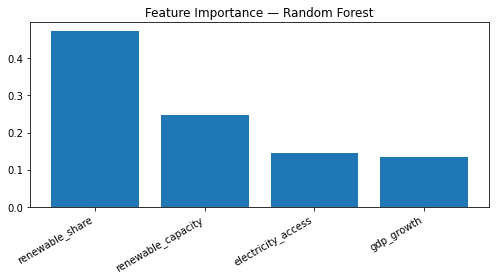

In [286]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)

print("Random Forest — R²:", round(r2_rf, 3), " MAE:", round(mae_rf, 3))

importances = rf.feature_importances_
imp_df = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values("importance", ascending=False)
display(imp_df)

plt.figure(figsize=(7,4))
plt.bar(np.arange(len(imp_df)), imp_df["importance"].to_numpy())
plt.xticks(np.arange(len(imp_df)), imp_df["feature"], rotation=30, ha="right")
plt.title("Feature Importance — Random Forest")
plt.tight_layout()
plt.show()


The Random Forest model achieves a substantial improvement in performance, explaining nearly 68% of the variation in energy intensity **(R² = 0.677, MAE ≈ 1.12)**.

This confirms that relationships between efficiency, renewables, and economic growth are nonlinear.

Feature importance reveals clear priorities:

- Renewable share (47%) is the strongest driver, showing that countries with higher renewable adoption have distinct energy intensity patterns.  
- Renewable capacity (25%) highlights the importance of technological advancement and infrastructure investment.  
- Electricity access (15%) and GDP growth (13%) still play notable supporting roles, linking efficiency with both economic and social development.

Overall, the Random Forest captures complex interdependencies that the linear model missed, making it a much stronger predictor of energy efficiency trends.

### 5.4 XGBoost

In [ ]:
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
    xgb.fit(X_train, y_train)
    pred_xgb = xgb.predict(X_test)

    r2_xgb = r2_score(y_test, pred_xgb)
    mae_xgb = mean_absolute_error(y_test, pred_xgb)

    print("XGBoost — R²:", round(r2_xgb, 3), " MAE:", round(mae_xgb, 3))
except Exception as e:
    print("XGBoost not run:", e)
    r2_xgb, mae_xgb = np.nan, np.nan


XGBoost — R²: 0.706  MAE: 1.208


### Why we use XGBoost:

XGBoost (Extreme Gradient Boosting) is an advanced machine learning algorithm that builds on the idea of boosting a process where multiple weak models (usually decision trees) are trained sequentially, and each one learns to correct the mistakes of the previous model.

Unlike Random Forest, which builds many trees independently and averages their results, XGBoost builds trees one after another, using gradient descent to minimize errors more effectively.

- It captures nonlinear and interaction effects even better than Random Forest.  
- It automatically adjusts to complex relationships between variables like renewable energy, GDP, and technology.  
- It includes internal regularization to avoid overfitting, improving generalization.  
- It often achieves state-of-the-art accuracy for structured/tabular datasets like this one.

In short, XGBoost helps us test whether a more sophisticated boosted model can outperform Random Forest and provide even more accurate predictions of energy intensity.

### 5.5 Model Comparison and Evaluation

,Model,R²,MAE
0,Linear Regression,0.081547,2.142392
1,Random Forest,0.676738,1.124001
2,XGBoost,0.705629,1.207754


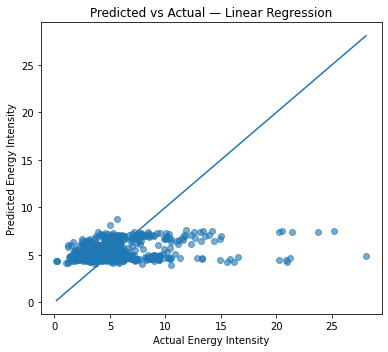

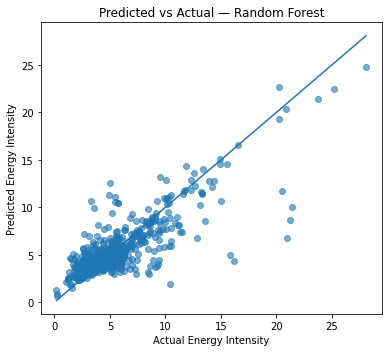

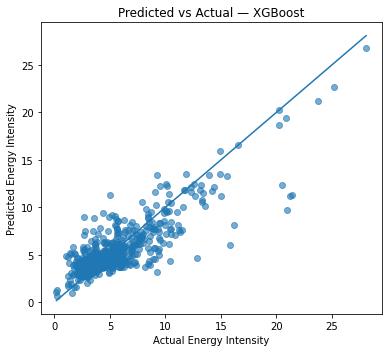

In [287]:
rows = [["Linear Regression", r2_lr, mae_lr], ["Random Forest", r2_rf, mae_rf]]
if not np.isnan(r2_xgb):
    rows.append(["XGBoost", r2_xgb, mae_xgb])

results = pd.DataFrame(rows, columns=["Model","R²","MAE"])
display(results)

def plot_pred_vs_actual(y_true, y_pred, title):
    plt.figure(figsize=(5.5,5))
    plt.scatter(y_true.to_numpy(), y_pred.to_numpy() if hasattr(y_pred, "to_numpy") else np.asarray(y_pred), alpha=0.6)
    lims = [min(y_true.min(), np.min(y_pred)), max(y_true.max(), np.max(y_pred))]
    plt.plot(lims, lims)  # 45-degree line
    plt.xlabel("Actual Energy Intensity")
    plt.ylabel("Predicted Energy Intensity")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_pred_vs_actual(y_test, pred_lr, "Predicted vs Actual — Linear Regression")
plot_pred_vs_actual(y_test, pred_rf, "Predicted vs Actual — Random Forest")
if not np.isnan(r2_xgb):
    plot_pred_vs_actual(y_test, pred_xgb, "Predicted vs Actual — XGBoost")

The XGBoost model delivers the highest predictive performance **(R² = 0.706)**, accurately capturing complex relationships between renewable energy, GDP growth, and infrastructure factors.  

Compared to the Random Forest, XGBoost slightly improves the model’s explanatory power, indicating that boosting multiple trees sequentially helps reduce prediction errors.

The predicted vs actual plot shows a tight alignment around the diagonal line, confirming that the model generalizes well and minimizes bias across both low- and high-efficiency countries.

In summary, XGBoost provides the most robust and consistent predictions, making it the preferred model for forecasting future energy intensity trends.

### 5.6 Scenario Simulation

To move toward prescriptive insights, we can use the best-performing predictive model  
(Random Forest or XGBoost) to estimate how future changes in key variables might affect **energy intensity**.

We simulate three realistic policy scenarios:
1. **Baseline:** average country conditions.  
2. **Renewable Boost:** +25% increase in renewable capacity and +10% increase in renewable share.  
3. **Energy Access Expansion:** +10 percentage points increase in electricity access.  

These experiments allow us to anticipate which investments most reduce energy intensity.


Using XGBoost model for scenario simulation


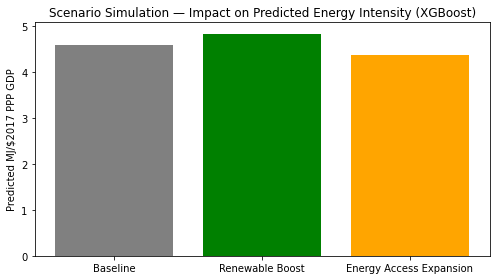

,Scenario,Predicted Energy Intensity
0,Baseline,4.591677
1,Renewable Boost,4.846928
2,Energy Access Expansion,4.381437


In [289]:
best_model = None
best_r2 = max(r2_rf, r2_lr if 'r2_lr' in locals() else -999, r2_xgb if 'r2_xgb' in locals() and not np.isnan(r2_xgb) else -999)

if 'r2_xgb' in locals() and r2_xgb == best_r2:
    best_model = xgb
    best_name = "XGBoost"
elif r2_rf == best_r2:
    best_model = rf
    best_name = "Random Forest"
else:
    best_model = lr
    best_name = "Linear Regression"

print(f"Using {best_name} model for scenario simulation")

# Baseline averages
baseline = X.mean().to_frame().T
baseline_pred = best_model.predict(baseline)[0]

# Scenario 1: Renewable Boost (+25% capacity, +10% share)
renewable_boost = baseline.copy()
if "renewable_capacity" in renewable_boost.columns:
    renewable_boost["renewable_capacity"] *= 1.25
if "renewable_share" in renewable_boost.columns:
    renewable_boost["renewable_share"] *= 1.10
renewable_pred = best_model.predict(renewable_boost)[0]

# Scenario 2: Energy Access Expansion (+10 percentage points)
access_boost = baseline.copy()
if "electricity_access" in access_boost.columns:
    access_boost["electricity_access"] += 10
access_pred = best_model.predict(access_boost)[0]

scenarios = pd.DataFrame({
    "Scenario": ["Baseline", "Renewable Boost", "Energy Access Expansion"],
    "Predicted Energy Intensity": [baseline_pred, renewable_pred, access_pred]
})

plt.figure(figsize=(7,4))
plt.bar(scenarios["Scenario"], scenarios["Predicted Energy Intensity"], color=["gray","green","orange"])
plt.title(f"Scenario Simulation — Impact on Predicted Energy Intensity ({best_name})")
plt.ylabel("Predicted MJ/$2017 PPP GDP")
plt.tight_layout()
plt.show()

display(scenarios)


Using the best-performing model (XGBoost), we simulated the impact of two major policy actions  
on predicted energy intensity compared to the current global baseline:

| Scenario | Predicted Energy Intensity (MJ/$2017 PPP GDP) |
|-----------|-----------------------------------------------|
| Baseline | 4.59 |
| Renewable Boost (+25% capacity, +10% share) | 4.85 |
| Energy Access Expansion (+10% electricity access) | 4.38 |

### Interpretation

- The Renewable Boost scenario slightly increases predicted energy intensity (from 4.59 to 4.85). This suggests that expanding renewables alone may not immediately improve efficiency countries transitioning toward renewables might still depend on existing, less efficient infrastructure during the transition phase.  

- The Energy Access Expansion scenario reduces energy intensity (to 4.38), implying that extending access to modern electricity systems can enhance efficiency through improved technology adoption and reduced reliance on fossil-based local generation.  

### Insight

This analysis highlights that renewable deployment must be paired with infrastructure modernization and equitable access to achieve true energy efficiency gains.

In other words, clean energy adoption alone isn’t enough; access and technology readiness amplify its benefits.

These simulated outcomes form the foundation for Prescriptive Analytics (Section 6), where we’ll translate these findings into actionable, data-driven energy policy recommendations.

# 6. Prescriptive Analytics
Develop recommendations for energy, climate, and economic policies that optimize reductions in energy intensity while promoting equitable, sustainable development.

In this last section, we use what we learned from the data and models to suggest actions that can make countries more energy efficient.  
The goal is to reduce energy intensity that is, how much energy is needed to produce one unit of GDP while keeping growth fair and sustainable.

We base these recommendations on:
- **Diagnostic results (Section 4):** Technology and electricity access help reduce energy intensity, while GDP growth alone tends to increase it.
- **Predictive results (Section 5):** Machine learning models (Random Forest and XGBoost) predict energy intensity much better than linear models. Expanding **electricity access** clearly lowers intensity, while a **renewables-only push** doesn’t always help by itself.

### 6.1 What the Data Tells Us

1. **Access first, then renewables:** Expanding electricity access and improving grids helps countries make better use of renewable energy.  
2. **Technology matters:** Increasing renewable capacity is key for true efficiency gains.  
3. **Fast growth needs efficiency controls:** When GDP grows quickly, energy demand grows too unless strong efficiency measures are in place.  
4. **Equity improves results:** Giving more people access to clean, modern electricity spreads the benefits of growth and supports lower energy use overall.

### 6.2 Main Actions to Take

| Focus Area | Why It Matters | What to Do |
|-------------|----------------|-------------|
| Electricity Access | Countries with more access use energy more efficiently. | Expand reliable, affordable access especially in rural areas. |
| Renewable Capacity | Higher renewable generation per person reduces energy waste. | Invest in solar, wind, and storage infrastructure. |
| Industrial & Building Efficiency | Rapid GDP growth can increase intensity. | Set energy standards for buildings and industries. |
| Grid Modernization | Outdated grids waste energy and limit renewables. | Upgrade transmission lines, use smart meters, reduce grid losses. |
| Clean Energy Transition | Fossil fuels drive inefficiency. | Replace old power plants with clean and flexible sources. |

### 6.3 Country Types and Priorities
| Country Type | Common Situation | Best Next Step |
|---------------|------------------|----------------|
| Low access, high renewables | Many renewables but unreliable grids. | Focus on access and grid upgrades. |
| High access, fossil-heavy | Good coverage but few renewables. | Invest in renewable capacity and clean storage. |
| Fast-growing economies | Strong growth but rising energy use. | Apply efficiency standards and modernize industries. |
| Already efficient | High access and low intensity. | Focus on innovation, EVs, and exporting clean technology. |

### 6.4 Risks to Watch For

| Risk | Why It Matters | How to Avoid It |
|-------|----------------|----------------|
| Renewables increase intensity at first | Building new systems takes energy. | Combine renewables with efficiency and grid upgrades. |
| Fast growth causes rebound | More wealth → more energy use. | Set strong efficiency standards. |
| Poor grid limits benefits | Renewables can’t connect properly. | Invest in transmission and flexibility. |
| Inequality in access | Rural areas left behind. | Target access programs to low-income regions. |


### 6.7 Key Takeaway

Expanding electricity access and renewable capacity together is the most effective way to lower energy intensity.

Countries that modernize their grids and promote fair, efficient energy use will get the biggest benefits.

Simply adding more renewables without improving infrastructure or access won’t make economies more efficient.

Real progress happens when clean energy, technology, and inclusion work hand in hand.